# Lecture Notes 3:Probability Distributions, Sampling 


## Normal Distribution Sampling


In [2]:
import numpy as np
import numpy.random as rnd
rnd.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
U = rnd.uniform(-1,1, size = 500)
help(rnd.uniform)
print(U.shape)
f"Mean: {U.mean():.3f} Variance: {U.var():.2f}"


Help on built-in function uniform:

uniform(...) method of mtrand.RandomState instance
    uniform(low=0.0, high=1.0, size=None)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less than high.  The default value is 1.0.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        

'Mean: -0.036 Variance: 0.33'

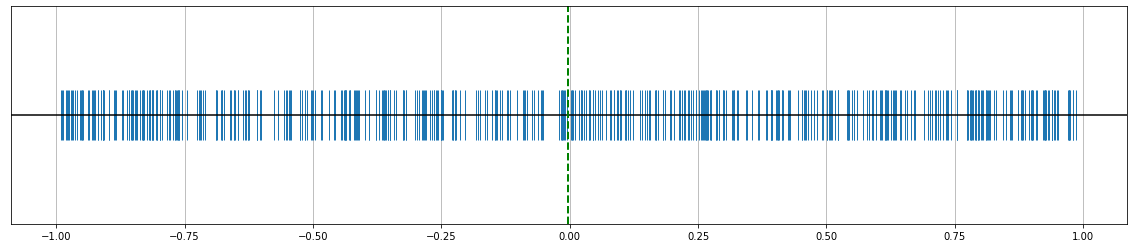

In [9]:
plt.figure(figsize=(20,4))
plt.plot(U,np.zeros_like(U), '|', ms=50)
plt.axhline(y = 0, color='k')
plt.axvline(x=U.mean(), ls='--',color='g', linewidth=2)
plt.grid(axis='x')
_=plt.yticks([])


[ 5. 10.  6.  4.  6.  3.  8.  3.  7. 10. 12.  9.  8. 10.  9.  2. 10.  2.
  7. 10.  6.  9.  6.  4.  2.  4.  6.  9.  8.  6.  5. 10.  7.  7.  5.  6.
  7.  5.  3.  6.  7.  8.  7.  4.  6.  9.  6. 12.  7.  7.  5.  5.  4.  8.
  4.  5.  3.  6.  6.  7.  3.  6.  1.  9.  5.  8.  4.  6.  4.  8.  3. 11.
  4.  8.  8.  8.  3.  3.  6.  4.]
[-0.99073595 -0.96585881 -0.94098167 -0.91610453 -0.89122739 -0.86635025
 -0.84147311 -0.81659597 -0.79171882 -0.76684168 -0.74196454 -0.7170874
 -0.69221026 -0.66733312 -0.64245598 -0.61757884 -0.59270169 -0.56782455
 -0.54294741 -0.51807027 -0.49319313 -0.46831599 -0.44343885 -0.41856171
 -0.39368456 -0.36880742 -0.34393028 -0.31905314 -0.294176   -0.26929886
 -0.24442172 -0.21954458 -0.19466743 -0.16979029 -0.14491315 -0.12003601
 -0.09515887 -0.07028173 -0.04540459 -0.02052744  0.0043497   0.02922684
  0.05410398  0.07898112  0.10385826  0.1287354   0.15361254  0.17848969
  0.20336683  0.22824397  0.25312111  0.27799825  0.30287539  0.32775253
  0.35262967  0.37

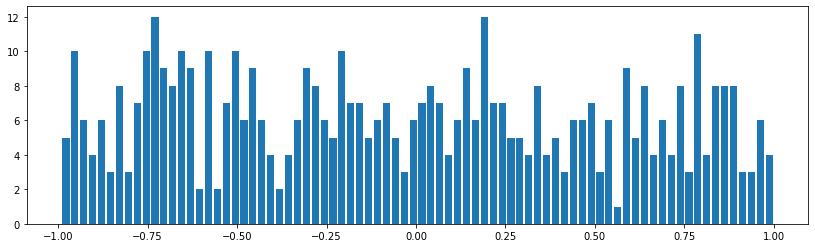

In [18]:
plt.figure(figsize=(14,4))
nums,ranges, _ = plt.hist(U, bins=80, rwidth=0.8)
print(nums)
print(ranges)


In [19]:
## if you dont want to plot the bars, use np.histogram:
nums, ranges = np.histogram(U, bins=30)
print(nums)
print(ranges)



[19 13 13 23 24 20 16 22 16 11 19 20 16 17 13 19 16 24 19 12 14 12 14 15
 16 14 19 18 14 12]
[-0.99073595 -0.92439691 -0.85805787 -0.79171882 -0.72537978 -0.65904074
 -0.59270169 -0.52636265 -0.46002361 -0.39368456 -0.32734552 -0.26100648
 -0.19466743 -0.12832839 -0.06198935  0.0043497   0.07068874  0.13702778
  0.20336683  0.26970587  0.33604491  0.40238396  0.468723    0.53506204
  0.60140109  0.66774013  0.73407917  0.80041822  0.86675726  0.9330963
  0.99943535]


In [26]:
X = rnd.normal(loc=1, scale=10, size=1000)
help(rnd.normal)
print(X.shape)
f'Mean:{X.mean():.3f} Variance: {X.var():.2f}'
# Mean ("centre") of distribution  loc=" "
# Standard Deviation of the distribution scale = " "
# 

Help on built-in function normal:

normal(...) method of mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shap

'Mean:0.364 Variance: 96.11'

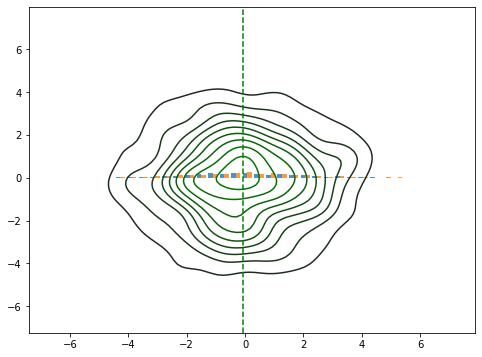

In [30]:
import seaborn as sns
plt.figure(figsize=(8,6))
plt.hist(X, bins=30, density=True, alpha=0.8)
sns.kdeplot(X,color='g',linewidth=3) # kernel density estimation plot (non-parametric statistical estimation of the data)
_=plt.axvline(X.mean(), ls='--', c='g')

## Multivariate Normal Distribution

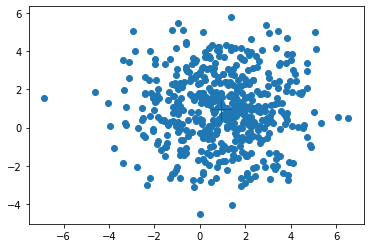

In [34]:
k=2 # specify the number of dimensions
mu=np.ones(k) # specify the mean values 
Sigma=4*np.eye(k) # dimension**2, since we need own-variance and covariance represented in the covariance matrix
X = rnd.multivariate_normal(mu,Sigma,size=500) # X -> (500,2)
plt.scatter(*X.T) # similar to plot(), but by default marker=point; '*' - first row will be interpreted as x values, second as y values
_=plt.plot(*X.mean(0),'+',c='r',ms=21) # mean(0) specifying the axis for which the mean is calculated

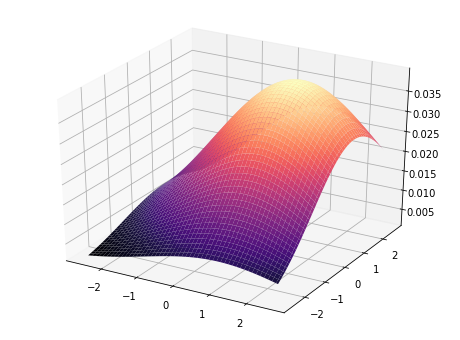

In [53]:
from matplotlib import cm; from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal as gaussian
#val = np.abs(X.min()) # taking minimum value to compute the mesh grid
val = 0.4*np.abs(X.max())
x = np.linspace(-val, val, 100)
y = np.linspace(-val,val,100)
x, y = np.meshgrid(x, y)
pos = np.dstack((x, y)) ## stacks two mesh's to third dimension
z = gaussian(mu, Sigma).pdf(pos) # compute the pdf for every position 
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d') # three-dimensional plot
_=ax.plot_surface(x, y, z, cmap=cm.magma)


# Multinomial Distribution

## Sampling from multinomial

In [41]:
fruits = np.array([
'watermelon',
'apple',
'grape',
'grapefruit',
'lemon',
'banana',
'cherry'
])


In [59]:
n = 5 # number of samples
p = np.ones(len(fruits))/len(fruits) #equal probability for every fruit to be taken 
repeat = np.tile(fruits, (n,1)) # repeat multiple (5) times to adjust shape to our mlt
print(repeat)

mlt = rnd.multinomial(1, p, size=(n)) # draw multinomial samples 5 times with an,→equal probability
print(mlt)
samples = repeat[mlt.astype(bool)] # show drown samples
print(samples)


[['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']]
[[0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]
['lemon' 'apple' 'lemon' 'grape' 'grape']


## Adjust selection probabilities

In [63]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05] # new probailities
print(np.sum(p)) # overfloat
mlt = rnd.multinomial(1, p, size=(5)) # draw multinomial samples 5 times with,→given probabilities
print(mlt)
samples = repeat[mlt.astype(bool)] # show drown samples
print(samples)


1.0000000000000002
[[0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]]
['apple' 'apple' 'apple' 'apple' 'apple']


## Another way to make discrete choices

In [61]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05]
# Cumulate them
l = np.cumsum([0] + p[:-1]) # lower-bounds
h = np.cumsum(p) # upper-bounds
print(l)
print(h)
# Draw a number between 0 and 1
u = np.random.uniform(0, 1)
# Find which basket it belongs to
s = np.logical_and(u > l, u < h)
print(s)
# retrieve the label
fruits[np.argmax(s)]


[0.   0.05 0.75 0.8  0.85 0.9  0.95]
[0.05 0.75 0.8  0.85 0.9  0.95 1.  ]
[False  True False False False False False]


'apple'

## Markov Chains


### Try to learn the transitions for  weather data 


In [72]:
# Transition matrix
T = np.array([
[0.9,0.1,0.0], # transiting from state 1 to state 1,2,3
[0.0,0.9,0.1], # transiting from state 2 to state 1,2,3
[1.0,0.0,0.0], # transiting from state 3 to state 1,2,3
])
T.sum(1) # row-wise value of one to distribute the transition probabilities

array([1., 1., 1.])

In [74]:
# Add empty state to transition matrix
pad_shape = ((0, 0), (1, 0)) # ((before_1, after_1), (before_2, after_2)) # adding zeros to compute lower/upper bounds
P = np.pad(T, pad_shape, mode='constant') #padding useful functions to concatenate matrices
print(P)


[[0.  0.9 0.1 0. ]
 [0.  0.  0.9 0.1]
 [0.  1.  0.  0. ]]


In [140]:
def mcstep(X, P):
    Xp = np.dot(X, P)
    Xc = np.cumsum(Xp, axis=1)
    L,H = Xc[:, :-1], Xc[:, 1:]
    R = np.random.uniform(0, 1, (len(Xp), 1))
    states = np.logical_and((R > L), (R < H))
#print(states.astype('int32'))
    return states.astype('int32')
mcstep(T,P)

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [83]:
A = np.tile([1.0,0,0], (5,1))
# or
A = np.outer(np.ones([5]),[1.0,0,0]) # (5,1) x (1,3) -> (5,3)
num_steps = 10
for i in range(num_steps):
    A = mcstep(A, P)

A.mean(axis=0) #How it looks like after 10 repetitions


array([0.4, 0.4, 0.2])

# 2 Autograd

To compute the gradient for a function defined with numpy

In [146]:
# Univariate function example
import autograd.numpy as ag_np
from autograd import grad

x = 10*ag_np.ones(1) # variable declaration
y = lambda x: 3 * x**2 + 2

print(grad(y)(x)) # evaluated at point x = 10

ModuleNotFoundError: No module named 'autograd'